In [1]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import xarray as xr
from scipy.interpolate import interp1d

%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [2]:
filename = '/Users/gabriel/Desktop/DATA-LASP/cmo_dmin.nc'
dataset = nc.Dataset(filename)



In [3]:
ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)

In [4]:
df.head(5)

,Time,X,Y,Z
0,1976-01-01 00:00:00,11473.481146,6198.944377,55353.0
1,1976-01-01 00:01:00,11473.661461,6198.610625,55353.0
2,1976-01-01 00:02:00,11474.541276,6199.085942,55353.0
3,1976-01-01 00:03:00,11472.421034,6198.802757,55353.0
4,1976-01-01 00:04:00,11472.601345,6198.469035,55354.0


(2423.8986215627037, 7637.928947183221)

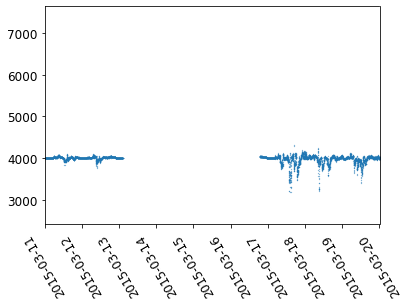

In [8]:
plt.scatter(df['Time'], df['Y'], s=.05)

plt.xlim([datetime.date(2015, 3, 11), datetime.date(2015, 3, 20)])
plt.xticks(rotation=120)
plt.xlim()
plt.ylim()

In [85]:
df['flag'] = 0
df['flag'][df['Y'].isnull()==True] = 1

/var/folders/nj/1lttj3_x16ldy51707n65swm0000gn/T/ipykernel_27750/2368399419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'][df['Y'].isnull()==True] = 1


In [91]:
df.std()

Time            4323 days 04:46:26.336035264
X                                 205.803477
Y                                 692.838916
Z                                  97.178327
flag                                0.202934
filled_cubic                      696.428101
dtype: object

In [92]:
df.mean()

/var/folders/nj/1lttj3_x16ldy51707n65swm0000gn/T/ipykernel_27750/3698961737.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()


X               11560.535839
Y                5285.744910
Z               55397.625321
flag                0.043034
filled_cubic     5315.916575
dtype: float64

In [89]:
df['filled_cubic'] = df['Y'].interpolate(kind='std')


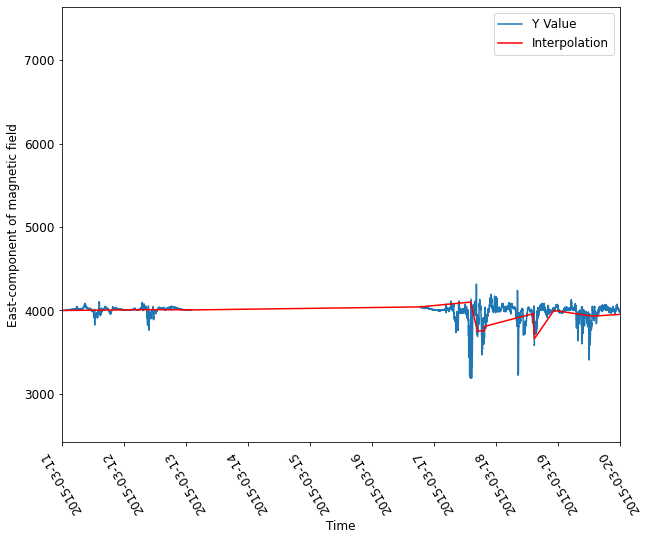

In [99]:
plt.figure(figsize=(10,8))
plt.plot(df['Time'], df['Y'], label='Y Value')
plt.plot(df['Time'][df['flag']==True], df['filled_cubic'][df['flag']==True], label='Interpolation', color='red')

plt.xlim([datetime.date(2015, 3, 11), datetime.date(2015, 3, 20)])
plt.xlabel('Time')
plt.ylabel('East-component of magnetic field')

plt.xticks(rotation=120)
plt.legend()

In [104]:
ymean = df['Y'].rolling(50).mean()
ystd = df['Y'].rolling(50).std()

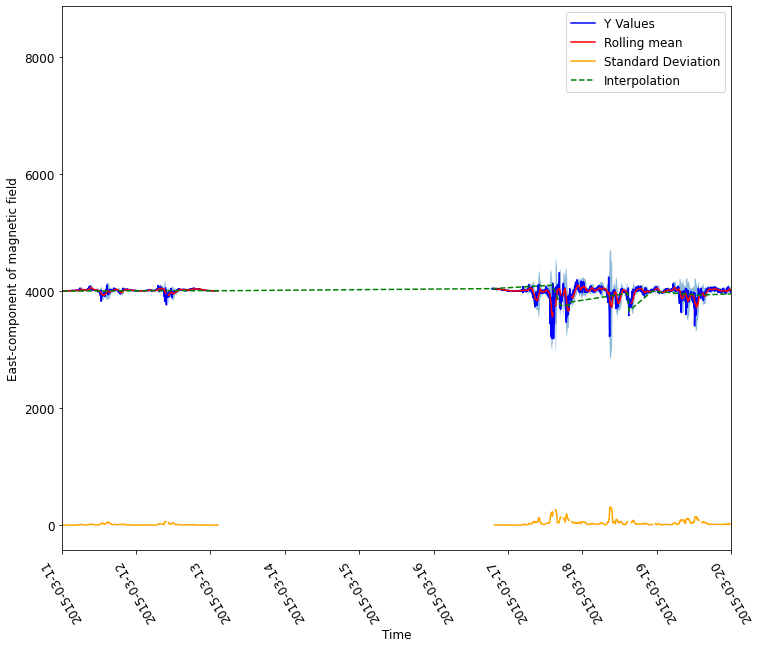

In [105]:
plt.figure(figsize=(12,10))

plt.plot(df['Time'], df['Y'], label='Y Values', color='blue')
plt.plot(df['Time'], ymean, color='red', label='Rolling mean')
plt.plot(df['Time'], ystd, color='orange', label='Standard Deviation')
plt.fill_between(df['Time'], ymean-3*ystd, ymean+3*ystd, alpha=0.5)
plt.plot(df['Time'][df['flag']==True], df['filled_cubic'][df['flag']==True], label='Interpolation', color='green',
         linestyle='dashed')
plt.xlim([datetime.datetime(2015, 3, 11, 00), datetime.datetime(2015, 3, 20, 00)])

plt.xlabel('Time')
plt.ylabel('East-component of magnetic field')
plt.xticks(rotation=120)
plt.legend()




In [82]:
bad_data = (df["Y"] < ymean - 3*ystd) | (df["Y"] > ymean + 3*ystd)

In [83]:
all_missing_values = df['flag'].isnull() | bad_data

(array([16505., 16506., 16507., 16508., 16509., 16510., 16511., 16512.,
        16513., 16514.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

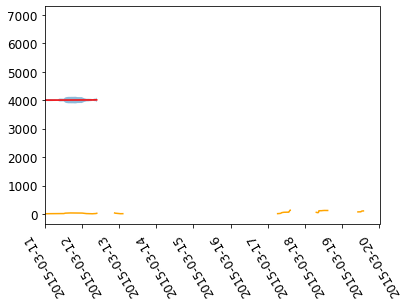

In [98]:
plt.plot(df['Time'], ymean, color='red', label='Rolling mean')
plt.plot(df['Time'], ystd, color='orange', label='Standard Deviation')
plt.fill_between(df['Time'], ymean-3*ystd, ymean+3*ystd, alpha=0.5)
plt.xlim([datetime.datetime(2015, 3, 11, 00), datetime.datetime(2015, 3, 20, 00)])
plt.xticks(rotation=120)

In [84]:
all_missing_values

0           False
1           False
2           False
3           False
4           False
            ...  
21565435    False
21565436    False
21565437    False
21565438    False
21565439    False
Length: 21565440, dtype: bool